In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
loan_data = pd.read_csv("Loan_Data.csv")

loan_data.shape


(614, 13)

### Data Cleaning


In [3]:
loan_data.columns

new_cols = [
    "loan_id",
    "gender",
    "married",
    "dependents",
    "education",
    "self_employed",
    "applicant_income",
    "coapplicant_income",
    "loan_amount",
    "loan_amount_term",
    "credit_history",
    "property_area",
    "loan_status",
]

loan_data.columns = new_cols


In [4]:
loan_data.head(10)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
loan_data.dtypes

loan_id                object
gender                 object
married                object
dependents             object
education              object
self_employed          object
applicant_income        int64
coapplicant_income    float64
loan_amount           float64
loan_amount_term      float64
credit_history        float64
property_area          object
loan_status            object
dtype: object

In [6]:
loan_data.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [7]:
loan_data = loan_data.dropna()

In [8]:
loan_data.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [9]:
loan_data["loan_amount"] = loan_data["loan_amount"] * 1000

loan_data["annual_income"] = (loan_data["applicant_income"] * 12) + (
    loan_data["coapplicant_income"] * 12
)


loan_data["term_years"] = loan_data["loan_amount_term"] / 12

loan_data.head()


,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status,annual_income,term_years
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N,73092.0,30.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y,36000.0,30.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y,59292.0,30.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y,72000.0,30.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,360.0,1.0,Urban,Y,115356.0,30.0


### Data Viz


In [10]:
plt.style.use("classic")
sn.set(style="whitegrid")

In [11]:
loan_data.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status,annual_income,term_years
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N,73092.0,30.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y,36000.0,30.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y,59292.0,30.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y,72000.0,30.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,360.0,1.0,Urban,Y,115356.0,30.0


Text(0.5, 1.0, 'Loan Status Count by Gender')

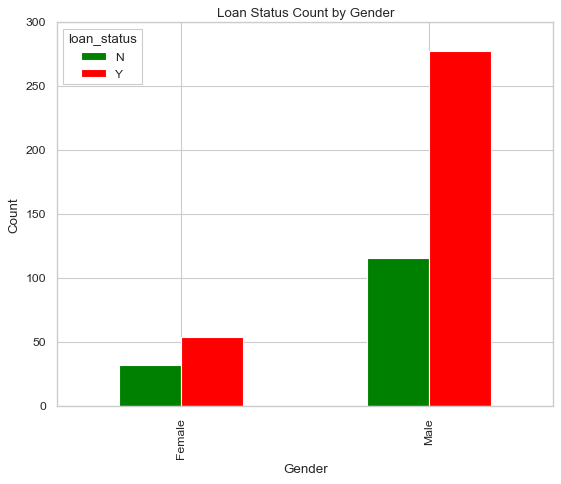

In [12]:
loan_status = loan_data.groupby(["gender"])["loan_status"].value_counts()
loan_status = loan_status.unstack(level=-1)

loan_status.plot(kind="bar", color=["green", "red"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Status Count by Gender")


Text(0.5, 1.0, 'Averge Annual Income by Education Level')

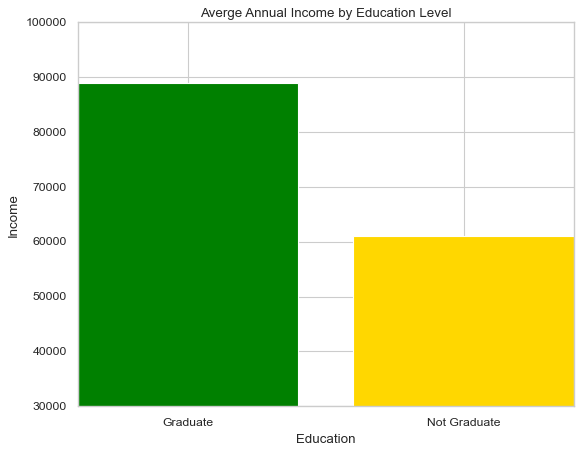

In [13]:
house_income = loan_data.groupby(["education"])["annual_income"].mean()

plt.bar(house_income.index, house_income.values, color=["green", "gold"])
plt.ylim(30000, 100000)
plt.xlabel("Education")
plt.ylabel("Income")
plt.title("Averge Annual Income by Education Level")


array([[<Axes: title={'center': 'applicant_income'}>,
        <Axes: title={'center': 'coapplicant_income'}>],
       [<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'loan_amount_term'}>],
       [<Axes: title={'center': 'credit_history'}>,
        <Axes: title={'center': 'annual_income'}>],
       [<Axes: title={'center': 'term_years'}>, <Axes: >]], dtype=object)

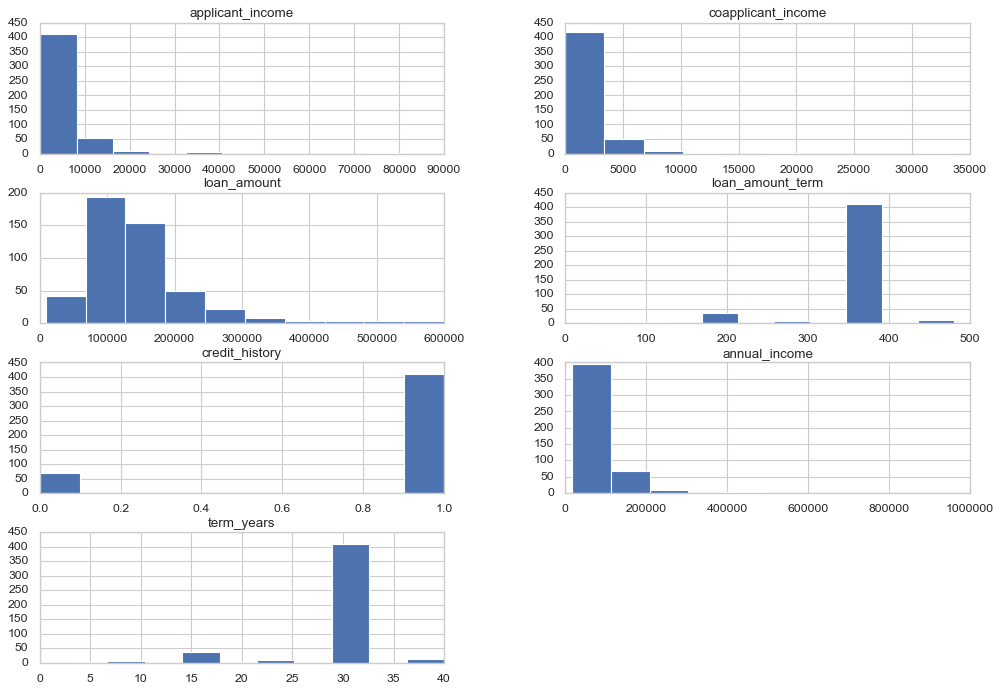

In [14]:
loan_data.hist(bins=10, figsize=(15, 10), layout=(4, 2))

<Axes: xlabel='annual_income'>

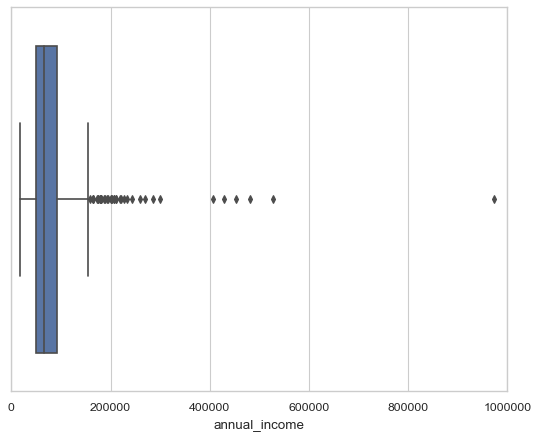

In [15]:
sn.boxplot(x=loan_data["annual_income"])

### Decision Tree


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import plot_tree


In [17]:
loan_data.head()


,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status,annual_income,term_years
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N,73092.0,30.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y,36000.0,30.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y,59292.0,30.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y,72000.0,30.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,360.0,1.0,Urban,Y,115356.0,30.0


In [18]:
loan_data.columns


Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status', 'annual_income', 'term_years'],
      dtype='object')

In [19]:
loan_data = loan_data.drop(columns="loan_id")

In [20]:
loan_dummies = pd.get_dummies(
    loan_data,
    columns=[
        "gender",
        "married",
        "dependents",
        "education",
        "self_employed",
        "property_area",
    ],
)

loan_dummies.dtypes

applicant_income             int64
coapplicant_income         float64
loan_amount                float64
loan_amount_term           float64
credit_history             float64
loan_status                 object
annual_income              float64
term_years                 float64
gender_Female                uint8
gender_Male                  uint8
married_No                   uint8
married_Yes                  uint8
dependents_0                 uint8
dependents_1                 uint8
dependents_2                 uint8
dependents_3+                uint8
education_Graduate           uint8
education_Not Graduate       uint8
self_employed_No             uint8
self_employed_Yes            uint8
property_area_Rural          uint8
property_area_Semiurban      uint8
property_area_Urban          uint8
dtype: object

In [21]:
y = loan_dummies["loan_status"]
X = loan_dummies.drop("loan_status", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [22]:
decision_tree = DecisionTreeClassifier(random_state=0)


In [23]:
decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)


In [25]:
table = pd.DataFrame()
table = table.append(
    {
        "Model": "Decision Tree",
        "F1": "%.3f" % f1_score(y_test, dt_pred, pos_label="Y"),
        "Recall": "%.3f" % recall_score(y_test, dt_pred, pos_label="Y"),
        "Precision": "%.3f" % precision_score(y_test, dt_pred, pos_label="Y"),
        "Accuracy": "%.3f" % accuracy_score(y_test, dt_pred),
    },
    ignore_index=True,
)
table


/var/folders/9r/m3130z5s3rbc10_6scgfp5t00000gn/T/ipykernel_11340/813613383.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(


,Model,F1,Recall,Precision,Accuracy
0,Decision Tree,0.790,0.747,0.838,0.725


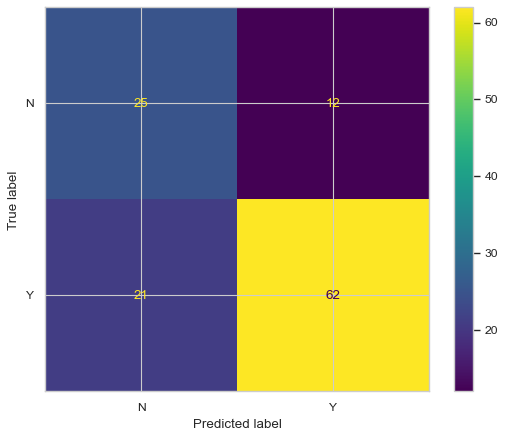

In [26]:
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    displ = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=model.classes_)

    displ.plot(values_format="")
    plt.show()


conf_matrix_plot(decision_tree, X_test, y_test)
